In [9]:
!ls

KC_sandbox01.ipynb  sample_submission.csv  test.csv  train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import statsmodels.api as sm

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [3]:
train_file = pd.read_csv(r'train.csv')
train_file.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [4]:
test_file = pd.read_csv(r'test.csv')
test_file.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [10]:
train_file.drop('id', axis = 1, inplace = True)
test = test_file.drop('id', axis = 1)

KeyError: 'id'

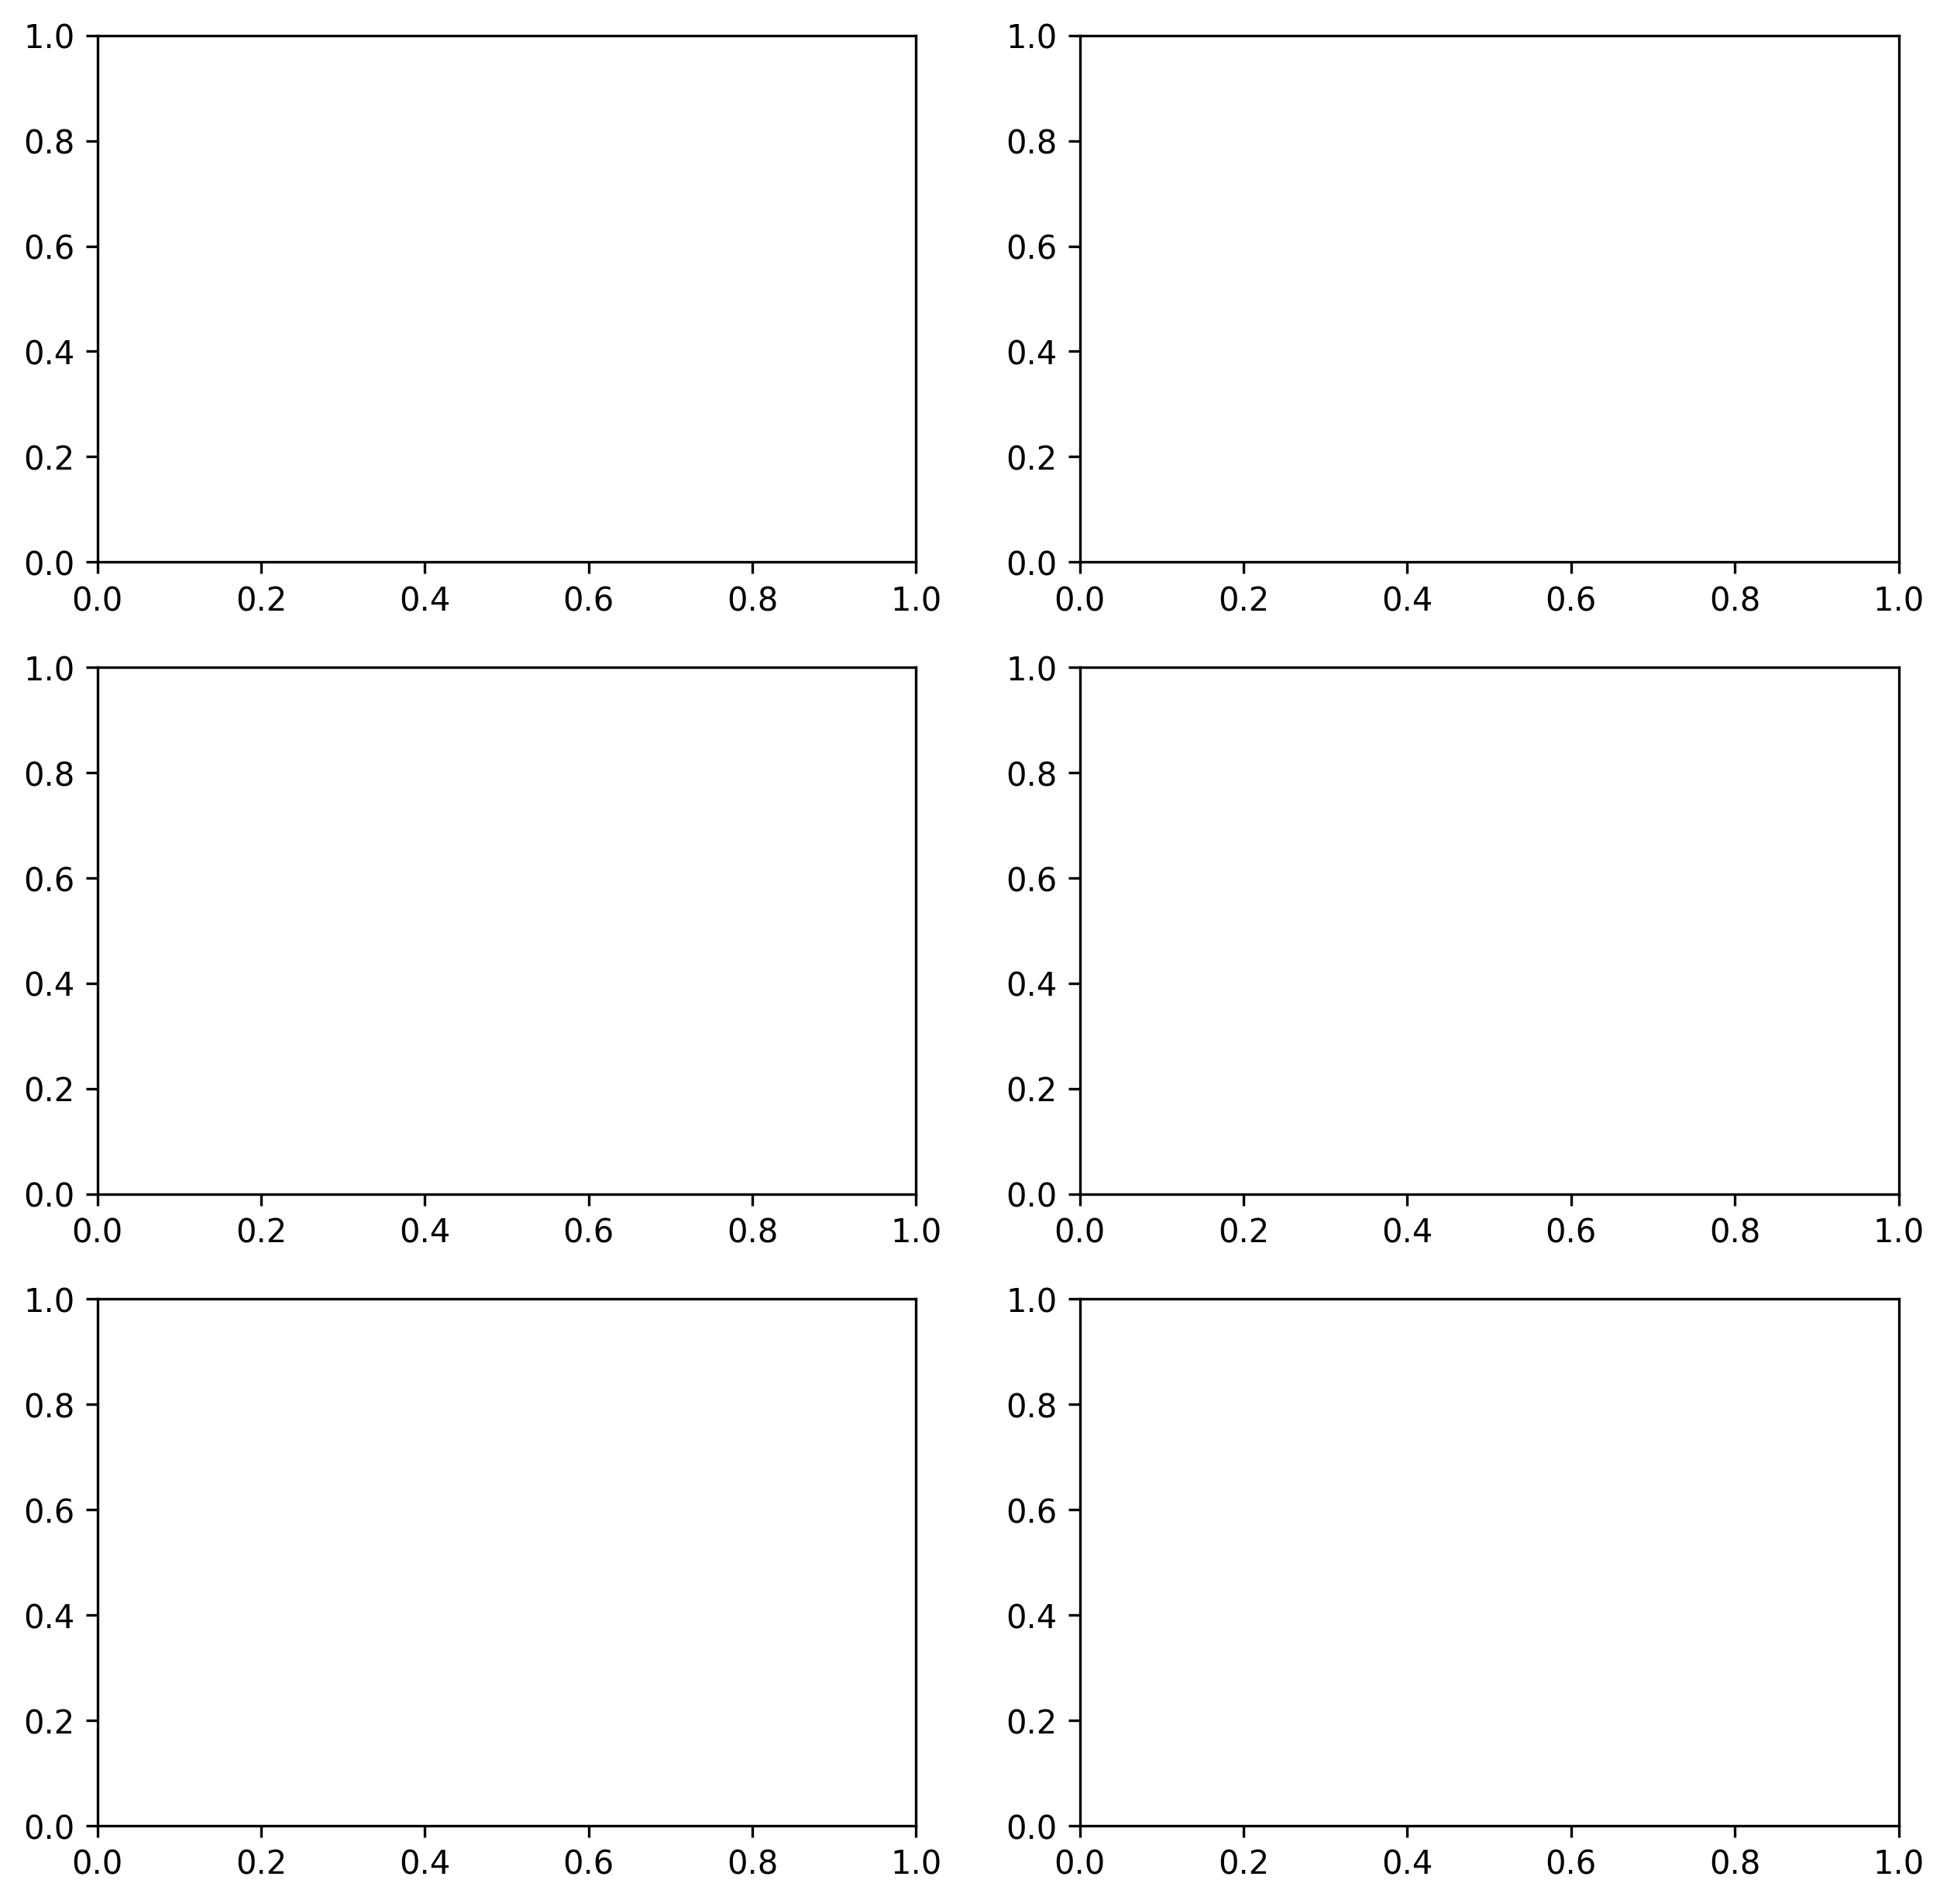

In [11]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(test_file.columns):
    sns.kdeplot(train_file[column], color='red')    
    sns.kdeplot(test_file[column], color='blue')
    #sns.kdeplot(orig_train[column], ax=ax[i], color=pal[1])
    
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test', 'Original Train'])
plt.tight_layout()